<a href="https://colab.research.google.com/github/ajaykothiya/ACD/blob/master/Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Phase I

### Group 19

- Ajaykumar Himmatbhai Kothiya (S3793661)
- Archita Amar Deshpande (S3752879)
- Avlok Bahri (S3768419)

This report is organized as follows:

- [Data Source and Description](#data-source-and-description) outlines Data source and desricption.
    - [Descriptive Features](#descriptive-features) presents each feature in the dataset.
    - [Target Features](#target-feature) presents target feature in the dataset
- [Goals and Objectives](#goals-and-objectives) outlines goals and objectives of modelling the dataset
- [Data Cleaning & Preprocessing](#data-cleaning-and-preprocessing) summarizes the data preparation process.
    - [Loading Dataset](#loading-dataset) presents data loading process and analyze the data
    - [Summary Statistics](#summary-statistics) presents summary statistics of the data
    - [Missing Values](#missing-values) analysing missing values
- [Data Exploration & Visualisation](#data-exploration-and-visualisation) summarizes the data exploration and visualisation process. 

# Data Source and Description <a name="data-source-and-description"></a>

The dataset here we have used for Project is related to passenger satisfaction with airline facilities.


*   This dataset contains an US airline passenger satisfaction survey.It shows factors are correlated to a satisfied (or dissatisfied) passenger.
*   This dataset has 23 attributes and 129880 instances in which descriptive featurs include 19 categorical attributes and 4 numerical attributes. The targer feature has two classes defined by "satisfied" and "neutral or dissatisfied" respectively.
*    Source of dataset: vaksakalli/datasets. GitHub. (2020). Retrieved 27 September 2020, from https://github.com/vaksakalli/datasets.

## Descriptive Features <a name="descriptive-features"></a>

The variable descriptions are as follows:

|name of the feature|data type|units|short description|
|:--|:--|:---|:---|
|Gender|Categorical|Male & Female|Gender of the passengers|
|customer_type|Categorical|Loyal customer & disloyal customer|Customer type|
|age|Numerical|year|The age of the Customer|
|type_of_travel|Categorical|Personal Travel & Business Travel|Purpose of the travel|
|customer_class|Categorical|Business, Eco & Eco Plus|Travel class of the Customer|
|flight_distance|Numerical|Kilometers|The flight distance of this journey|
|inflight_wifi_service|Ordinal|0:Not Applicable;1-5|Satisfaction level of the inflight wifi service|
|departure_arrival_time_convenient|Ordinal|0:Not Applicable;1-5|Satisfaction level of Departure/Arrival time convenient|
|ease_of_online_booking|Ordinal|0:Not Applicable;1-5|Satisfaction level of online booking|
|gate_location|Ordinal|0:Not Applicable;1-5|Satisfaction level of Gate location|
|food_and_drink|Ordinal|0:Not Applicable;1-5|Satisfaction level of Food and drink|
|online_boarding|Ordinal|0:Not Applicable;1-5|Satisfaction level of online boarding|
|seat_comfort|Ordinal|0:Not Applicable;1-5|Satisfaction level of Seat comfort|
|inflight_entertainment|Ordinal|0:Not Applicable;1-5|Satisfaction level of inflight entertainment|
|onboard_service|Ordinal|0:Not Applicable;1-5|Satisfaction level of On-board service|
|leg_room_service|Ordinal|0:Not Applicable;1-5|Satisfaction level of Leg room service|
|baggage_handling|Ordinal|0:Not Applicable;1-5|Satisfaction level of baggage handling|
|checkin_service|Ordinal|0:Not Applicable;1-5|Satisfaction level of checkin service|
|inflight_service|Ordinal|0:Not Applicable;1-5|Satisfaction level of inflight service|
|cleanliness|Ordinal|0:Not Applicable;1-5|Satisfaction level of Cleanliness|
|departure_delay_in_minutes|Numerical|minutes|Minutes delayed when departure|
|arrival_delay_in_minutes|Numerical|minutes|Minutes delayed when arrival|

## Target Feature <a name="target-feature"> </a>

Target feature is `satisfaction`, which is a categorical variable having values satisfied and neutral or dissatisfied.

# Goals and Objectives <a name="goals-and-objectives"></a>

With a great extent of increase in data and advancement in technology, the commercial businesses like Airlines focus on customer satisfaction through surveys and feedbacks to sustain in market. As it became very easy for customers to put up their experiences in feedback/survey forms, these responses play pivotal role in company's decision making to know what are the wrong pits and how it can be improved. 
This project aims to predict whether the passenger is satisfied or not with their airline experience. The evaluation metric levels are designed along with customer's basic information to identify the their experiences and recorded as satisfied and neutral or dissatisfied.

We are modelling this dataset because this data set has enough mixture of categorical and numerical attributes that are perfect for regression modelling that we will going to perform in next project phase. By modeing this data we can able to improve airline facilities by providing prediction of different factors. 

# Data Cleaning & Preprocessing <a name="data-cleaning-and-preprocessing"></a>

## Loading Dataset <a name="loading-dataset"></a>

In [ ]:
!git clone -l -s git://github.com/ajaykothiya/ACD.git ACD
%cd ACD
!ls

fatal: destination path 'ACD' already exists and is not an empty directory.
/content/ACD
Group19_Data.csv  Phase1.ipynb	README.md


In [ ]:

!pip install --upgrade altair
!pip install vega vega_datasets

import scipy
import numpy as np
import pandas as pd
import altair as alt

pd.set_option('display.max_columns', None)

from scipy import stats
from sklearn import metrics, preprocessing
from IPython.core.interactiveshell import InteractiveShell

%config InlineBackend.figure_format = 'retina'
InteractiveShell.ast_node_interactivity = "all"
alt.renderers.enable('html') # required in Jupyter notebooks

Requirement already up-to-date: altair in /usr/local/lib/python3.6/dist-packages (4.1.0)


RendererRegistry.enable('html')

In [ ]:
!pip install nbconvert

In [ ]:
# Reading .csv file as df with sep=';' as argument to function

df = pd.read_csv('Group19_Data.csv')

In [ ]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Showing size of Dataframe

df.shape

(129880, 23)

In [ ]:
# Listing all columns of Dataframes

df.columns.values

array(['Gender', 'customer_type', 'age', 'type_of_travel',
       'customer_class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding',
       'seat_comfort', 'inflight_entertainment', 'onboard_service',
       'leg_room_service', 'baggage_handling', 'checkin_service',
       'inflight_service', 'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes', 'satisfaction'], dtype=object)

In [ ]:
# Representing Dataframes datatypes

df.dtypes

Gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
customer_class                        object
flight_distance                        int64
inflight_wifi_service                  int64
departure_arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
satisfacti

In [ ]:
## change datatype to object

df['inflight_wifi_service'] = df['inflight_wifi_service'].astype('O',copy=False)
df['departure_arrival_time_convenient'] = df['departure_arrival_time_convenient'].astype('O',copy=False)
df['ease_of_online_booking'] = df['ease_of_online_booking'].astype('O',copy=False)
df['gate_location'] = df['gate_location'].astype('O',copy=False)
df['food_and_drink'] = df['food_and_drink'].astype('O',copy=False)
df['online_boarding'] = df['online_boarding'].astype('O',copy=False)
df['seat_comfort'] = df['seat_comfort'].astype('O',copy=False)
df['inflight_entertainment'] = df['inflight_entertainment'].astype('O',copy=False)
df['onboard_service'] = df['onboard_service'].astype('O',copy=False)
df['leg_room_service'] = df['leg_room_service'].astype('O',copy=False)
df['baggage_handling'] = df['baggage_handling'].astype('O',copy=False)
df['checkin_service'] = df['checkin_service'].astype('O',copy=False)
df['inflight_service'] = df['inflight_service'].astype('O',copy=False)
df['cleanliness'] = df['cleanliness'].astype('O',copy=False)

df['departure_delay_in_minutes'] = df['departure_delay_in_minutes'].astype('float')

## Summary Statistics <a name="summary-statistics"></a>

In [ ]:
# Showing summary statistics for the numeric columns

df.describe(include=('int64','float64'))


,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [ ]:
# Showing summary statistics for the categorical columns

df.describe(include='object')

,Gender,customer_type,type_of_travel,customer_class,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,2,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,65899,106100,89693,62160,32320,31880,30393,35717,30563,38468,39756,36791,38703,35886,46761,36333,47323,33969,73452


In [ ]:
categorical_cols = df.columns[df.dtypes==object].tolist()
numeric_cols = df.columns[df.dtypes!=object].tolist()

In [ ]:
categorical_cols

['Gender',
 'customer_type',
 'type_of_travel',
 'customer_class',
 'inflight_wifi_service',
 'departure_arrival_time_convenient',
 'ease_of_online_booking',
 'gate_location',
 'food_and_drink',
 'online_boarding',
 'seat_comfort',
 'inflight_entertainment',
 'onboard_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 'satisfaction']

In [ ]:
for col in categorical_cols:
    print('Column ' + col + ':')
    print(df[col].value_counts(), '\n')

Column Gender:
Female    65899
Male      63981
Name: Gender, dtype: int64 

Column customer_type:
Loyal Customer       106100
disloyal Customer     23780
Name: customer_type, dtype: int64 

Column type_of_travel:
Business travel    89693
Personal Travel    40187
Name: type_of_travel, dtype: int64 

Column customer_class:
Business    62160
Eco         58309
Eco Plus     9411
Name: customer_class, dtype: int64 

Column inflight_wifi_service:
2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: inflight_wifi_service, dtype: int64 

Column departure_arrival_time_convenient:
4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: departure_arrival_time_convenient, dtype: int64 

Column ease_of_online_booking:
3    30393
2    30051
4    24444
1    21886
5    17424
0     5682
Name: ease_of_online_booking, dtype: int64 

Column gate_location:
3    35717
4    30466
2    24296
1    21991
5    17409
0        1
Name: gate_location, dtype: int64 

Column food_and_

## Missing Values <a name="missing-values"></a>

In [ ]:
# checking for null values in every columns

df.isnull().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [ ]:
# Imputing missing values in categorical columns

for col in categorical_cols:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

In [ ]:
# Imputing missing values in numeric columns

for col in numeric_cols:
    mean = df[col].mean()
    df[col] = df[col].fillna(mean)

In [ ]:
# Let's have a look at our clean data

df.sample(10, random_state=50)

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
55467,Male,Loyal Customer,19,Business travel,Business,1979,3,4,4,4,3,4,3,3,2,4,3,3,3,3,0.0,0.0,neutral or dissatisfied
122448,Female,Loyal Customer,56,Business travel,Business,2255,4,4,4,4,3,4,4,4,4,4,4,4,4,4,26.0,14.0,satisfied
31031,Female,Loyal Customer,59,Business travel,Eco Plus,253,2,3,3,3,1,5,4,2,2,2,2,3,2,3,0.0,10.0,satisfied
73719,Male,Loyal Customer,46,Business travel,Eco,102,4,5,5,5,4,4,4,4,5,2,2,5,2,4,4.0,8.0,satisfied
76384,Male,Loyal Customer,16,Personal Travel,Business,395,4,4,4,1,5,4,5,5,3,2,4,3,5,5,81.0,90.0,neutral or dissatisfied
4394,Male,Loyal Customer,47,Business travel,Eco,164,2,1,3,1,2,2,2,2,1,1,2,1,3,2,23.0,23.0,neutral or dissatisfied
92238,Female,Loyal Customer,49,Business travel,Business,3496,1,1,1,1,5,5,5,4,3,4,4,5,3,5,188.0,242.0,satisfied
15387,Male,Loyal Customer,41,Business travel,Eco,86,4,4,4,4,4,4,4,4,2,2,1,4,2,4,2.0,9.0,satisfied
74435,Male,Loyal Customer,10,Personal Travel,Eco,1021,3,3,3,4,3,3,3,3,2,4,2,5,3,3,2.0,0.0,neutral or dissatisfied
122995,Female,Loyal Customer,35,Business travel,Business,1840,2,3,2,2,4,4,5,4,4,3,4,3,4,4,0.0,0.0,satisfied


# Data Exploration & Visualisation <a name="data-exploration-and-visualisation"></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 720x360 with 0 Axes>

[Text(0, 0, 'neutral or dissatisfied'), Text(0, 0, 'satisfied')]

Text(0.5, 1.0, "Figure 1: Bar Chart of Passenger's airline satisfaction level")

Text(0.5, 21.5, 'satisfaction')

Text(41.5, 0.5, 'Count')

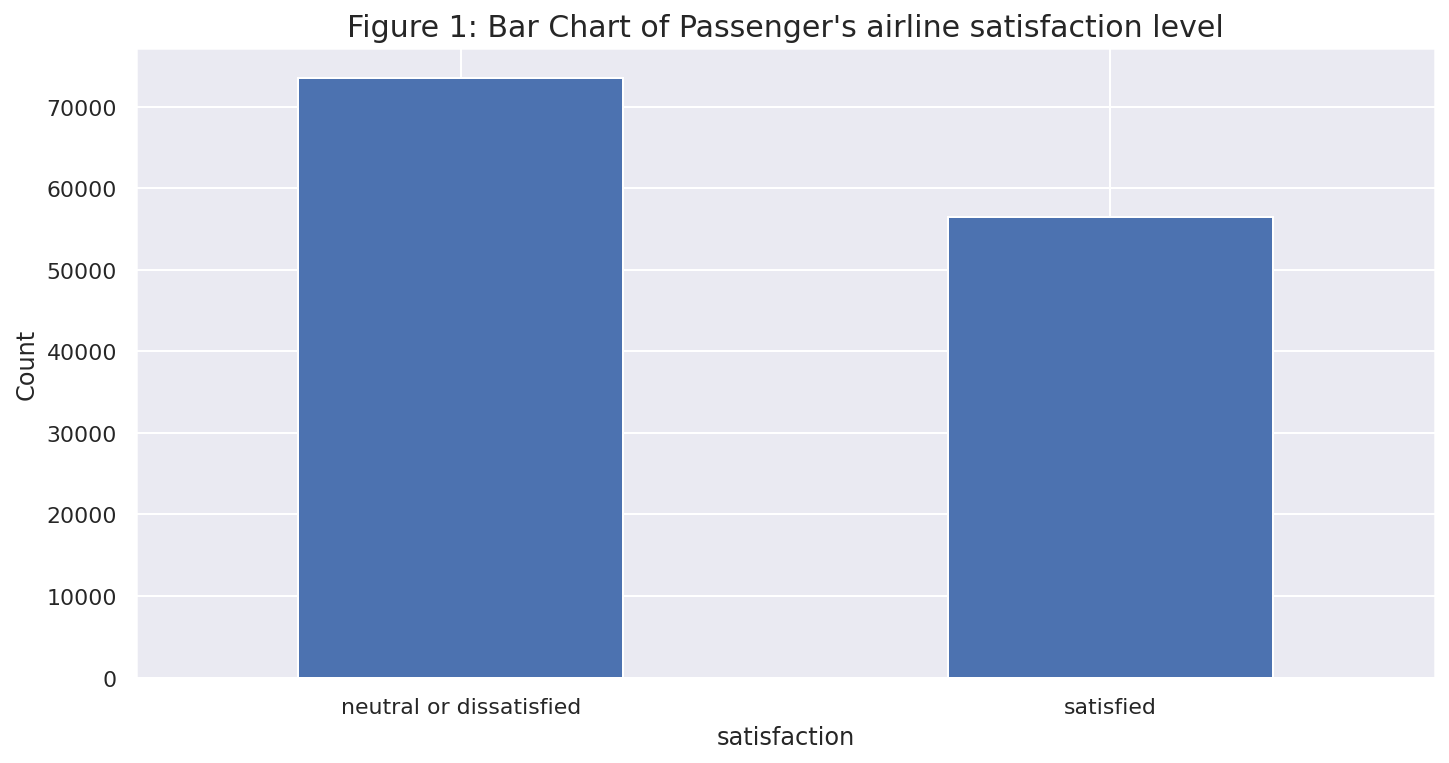

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

plt.figure(figsize=(10, 5))
ax = df['satisfaction'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(),rotation=360)
plt.tight_layout()
plt.title("Figure 1: Bar Chart of Passenger's airline satisfaction level", fontsize = 15)
plt.xlabel("satisfaction")
plt.ylabel("Count")
plt.show()

From above bar graph, it is clear that passengers's satisfaction ratio is less.
Around 75000 passengers are neutral or not satisfied with this airline facilities.

<Figure size 720x360 with 0 Axes>

[Text(0, 0, 'Loyal Customer'), Text(0, 0, 'disloyal Customer')]

Text(0.5, 1.0, "Figure 2: Bar Chart of Passenger's type")

Text(0.5, 21.5, "Passenger's type")

Text(34.5, 0.5, 'Count')

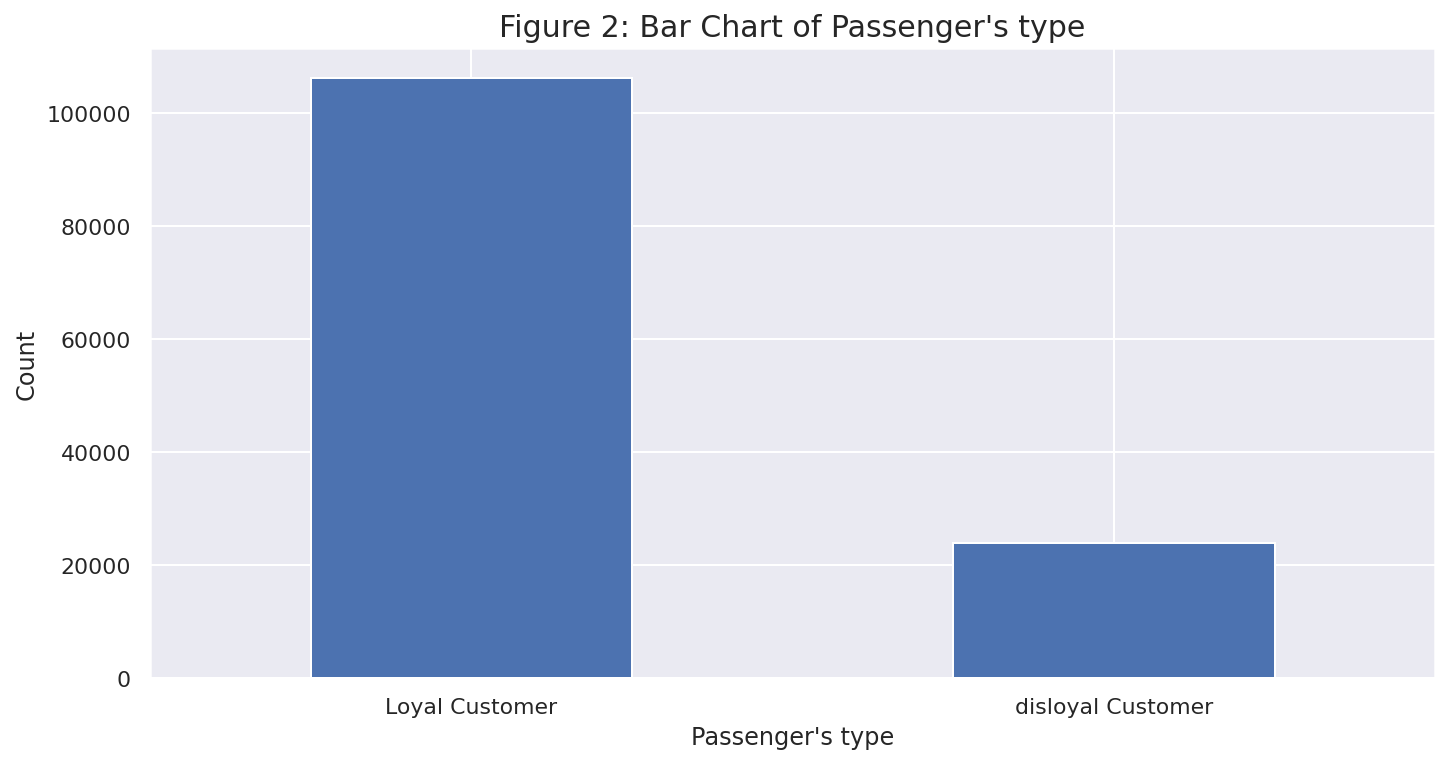

In [ ]:

plt.figure(figsize=(10,5))
ax = df['customer_type'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(),rotation=360)
plt.tight_layout()
plt.title("Figure 2: Bar Chart of Passenger's type", fontsize = 15)
plt.xlabel("Passenger's type")
plt.ylabel("Count")
plt.show()

Bar grapgh shows that most of the customers are loyal in terms of their behaviour, whereas around 22000 passengers are disloyal customers.

<Figure size 720x360 with 0 Axes>

[Text(0, 0, 'Business travel'), Text(0, 0, 'Personal Travel')]

Text(0.5, 1.0, "Figure 3: Bar Chart of Passenger's type of travel")

Text(0.5, 21.5, 'Type of travel')

Text(41.5, 0.5, 'Count')

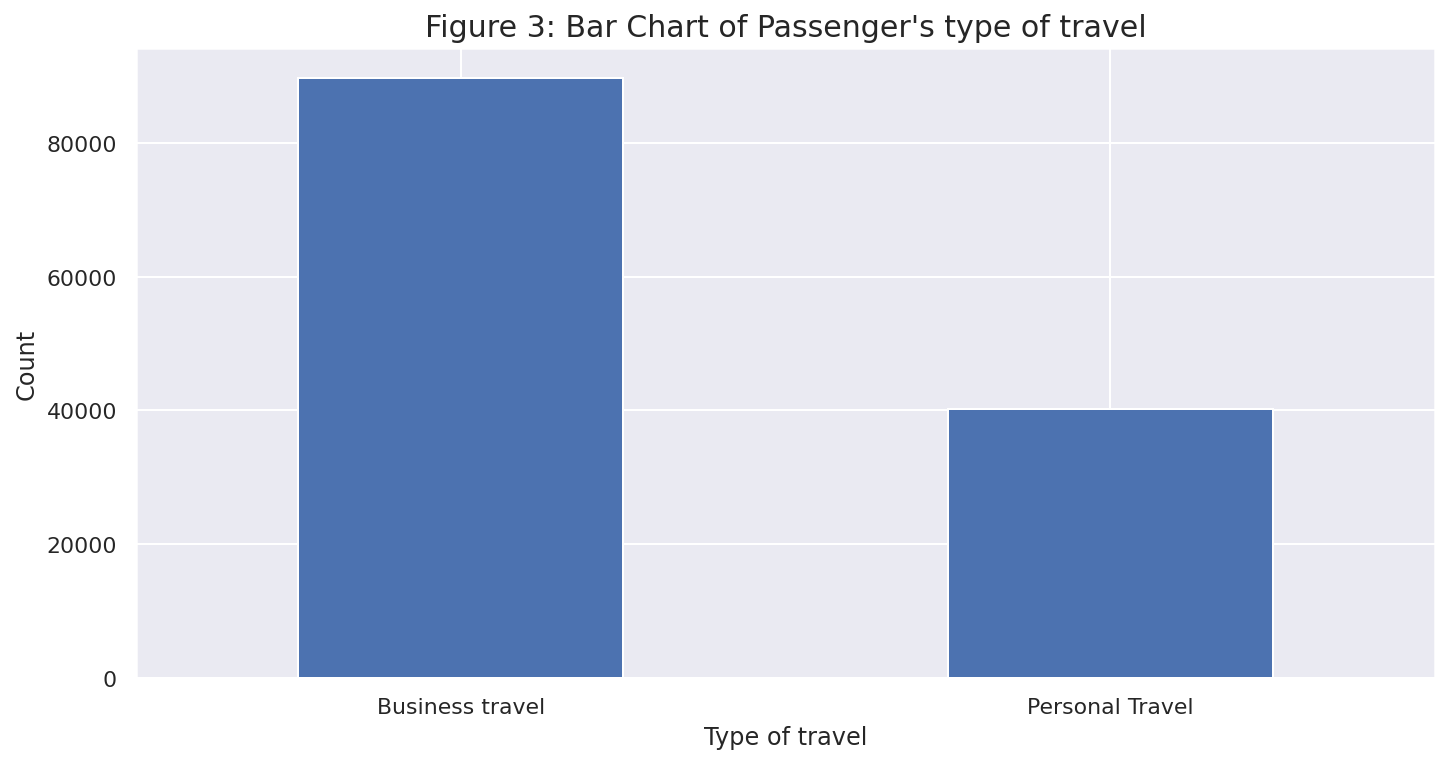

In [ ]:

plt.figure(figsize=(10,5))
ax = df['type_of_travel'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(),rotation=360)
plt.tight_layout()
plt.title("Figure 3: Bar Chart of Passenger's type of travel", fontsize = 15)
plt.xlabel("Type of travel")
plt.ylabel("Count")
plt.show()

This airline has conducted around 87000 business trips.Number of personal trips were only around 40000.

<Figure size 720x360 with 0 Axes>

[Text(0, 0, 'Business'), Text(0, 0, 'Eco'), Text(0, 0, 'Eco Plus')]

Text(0.5, 1.0, "Figure 4: Bar Chart of Passenger's class")

Text(0.5, 21.5, 'Class')

Text(41.5, 0.5, 'Count')

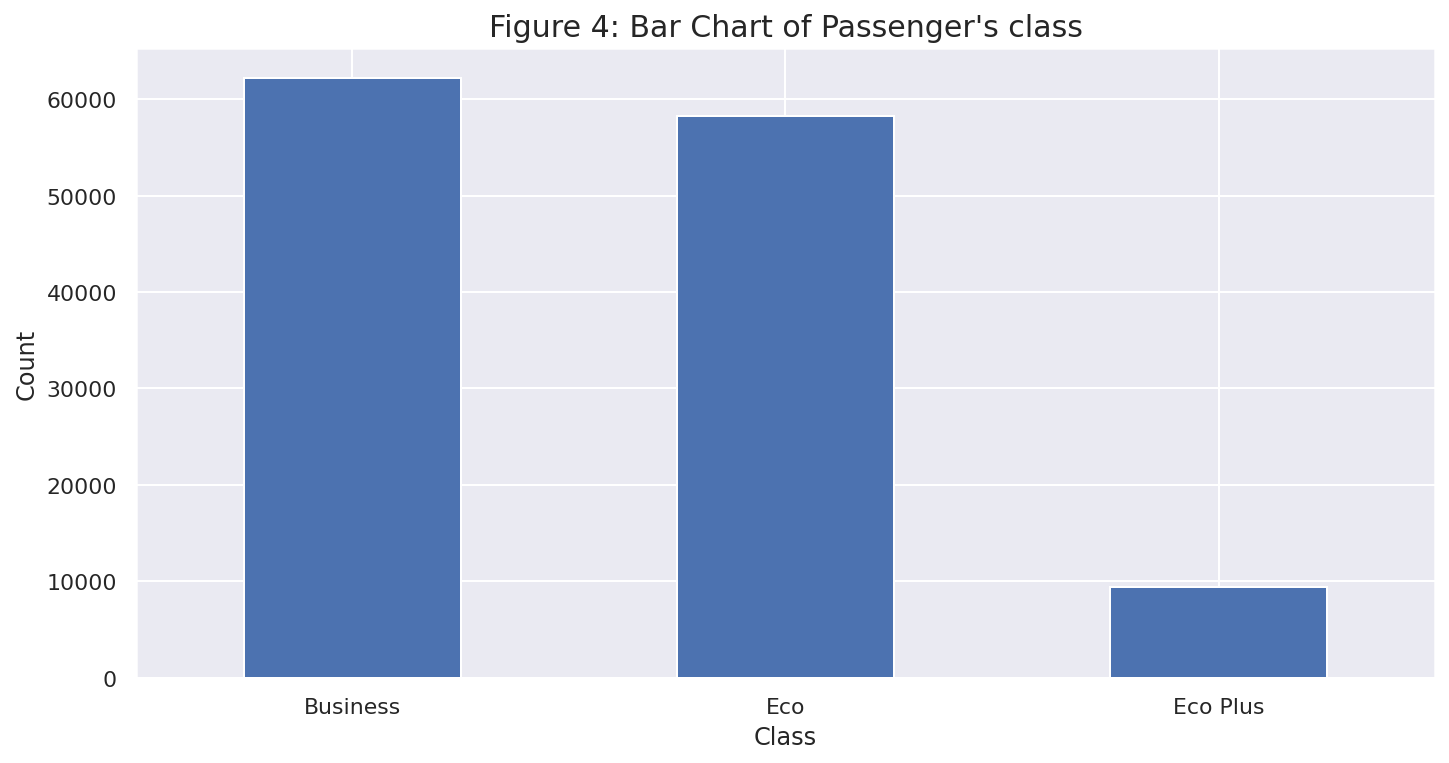

In [ ]:
plt.figure(figsize=(10,5))
ax = df['customer_class'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(),rotation=360)
plt.tight_layout()
plt.title("Figure 4: Bar Chart of Passenger's class", fontsize = 15)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Bar graph shows that, most number of passengers have prefered business and Eco Class beacuse of good facilies.Only around 9000 passengers have prefered Echo plus class while travelling.

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, "Figure 5: Histogram of Passenger's age")

Text(0.5, 21.5, 'Age')

Text(45.125, 0.5, 'Density')

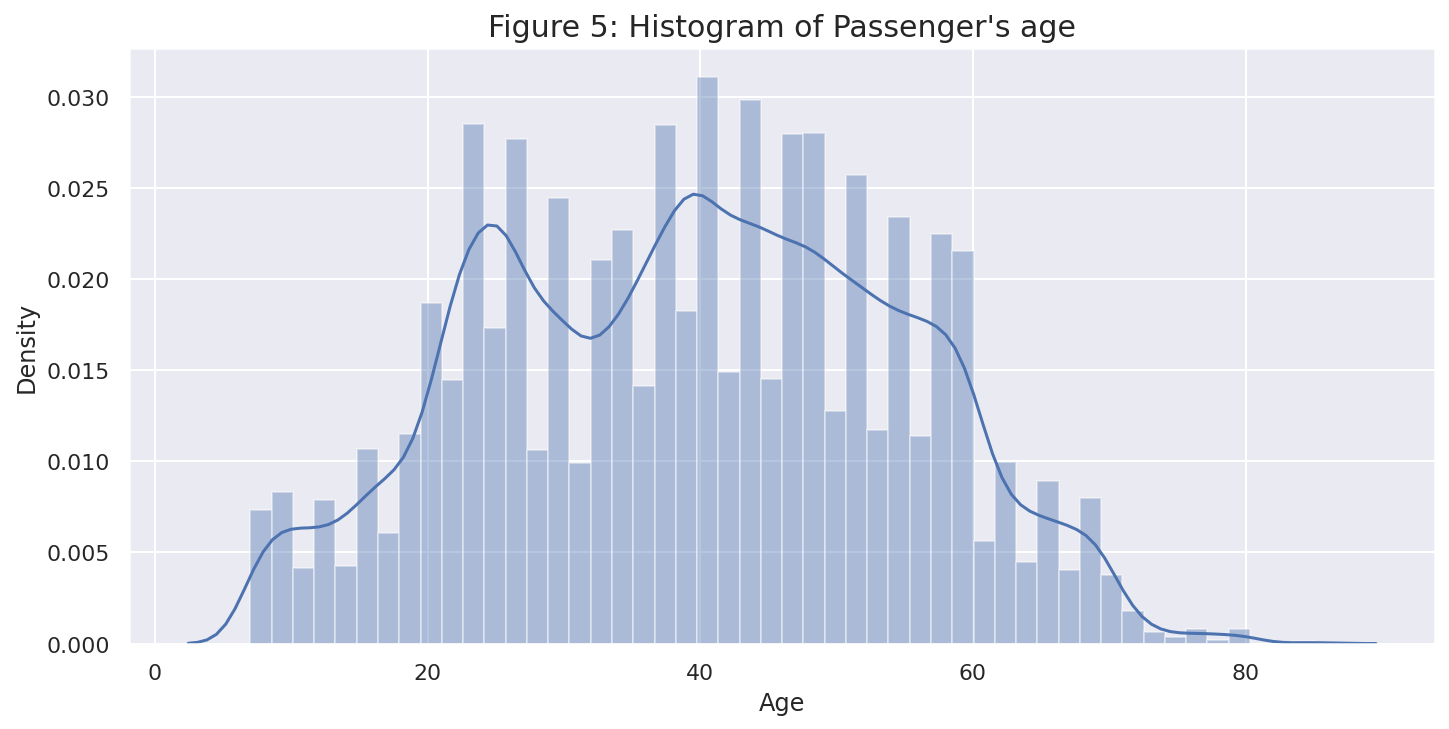

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df['age'])
plt.tight_layout()
plt.title("Figure 5: Histogram of Passenger's age", fontsize = 15)
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


Here, Most of the passengers have travelled in this airline were the age between 20 to 60. Number of old people travelling in this airline were very less.

<Figure size 864x504 with 0 Axes>

Text(0.5, 1.0, 'Figure 6: Bar chart of Gender v/s Satisfaction')

Text(0, 0.5, 'Number of Passengers')

Text(0.5, 0, 'Gender')

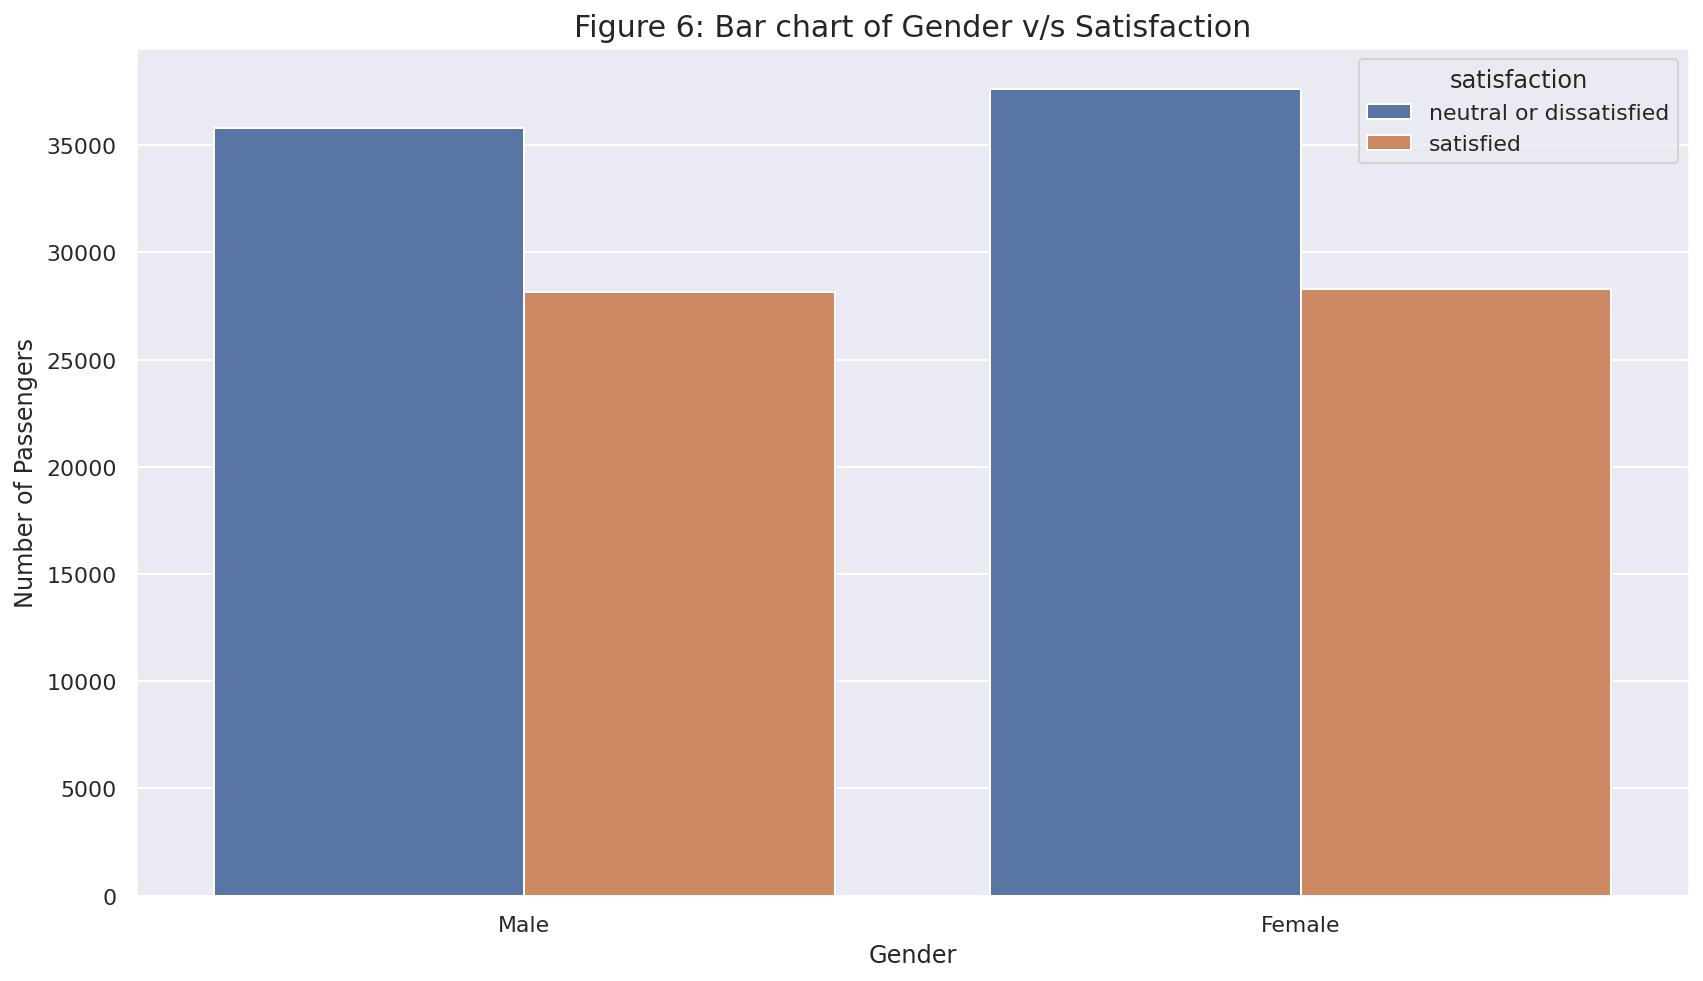

In [ ]:

plt.figure(figsize=(12,7))
ax = sns.countplot(x='Gender', hue='satisfaction', data=df)
ax.set_title("Figure 6: Bar chart of Gender v/s Satisfaction",fontsize = 15)
ax.set_ylabel("Number of Passengers",fontsize=12)
ax.set_xlabel("Gender",fontsize=12)
plt.tight_layout()
plt.show()

Bar graph shows that number os neutral or dissatisfaction level in female were higher that male.Almost same number of male and female were satisfied with this airline.

<Figure size 864x504 with 0 Axes>

Text(0.5, 1.0, "Figure 7: Bar chart of Passenger's type v/s Satisfaction")

Text(0, 0.5, 'Number of Passengers')

Text(0.5, 0, 'Type')

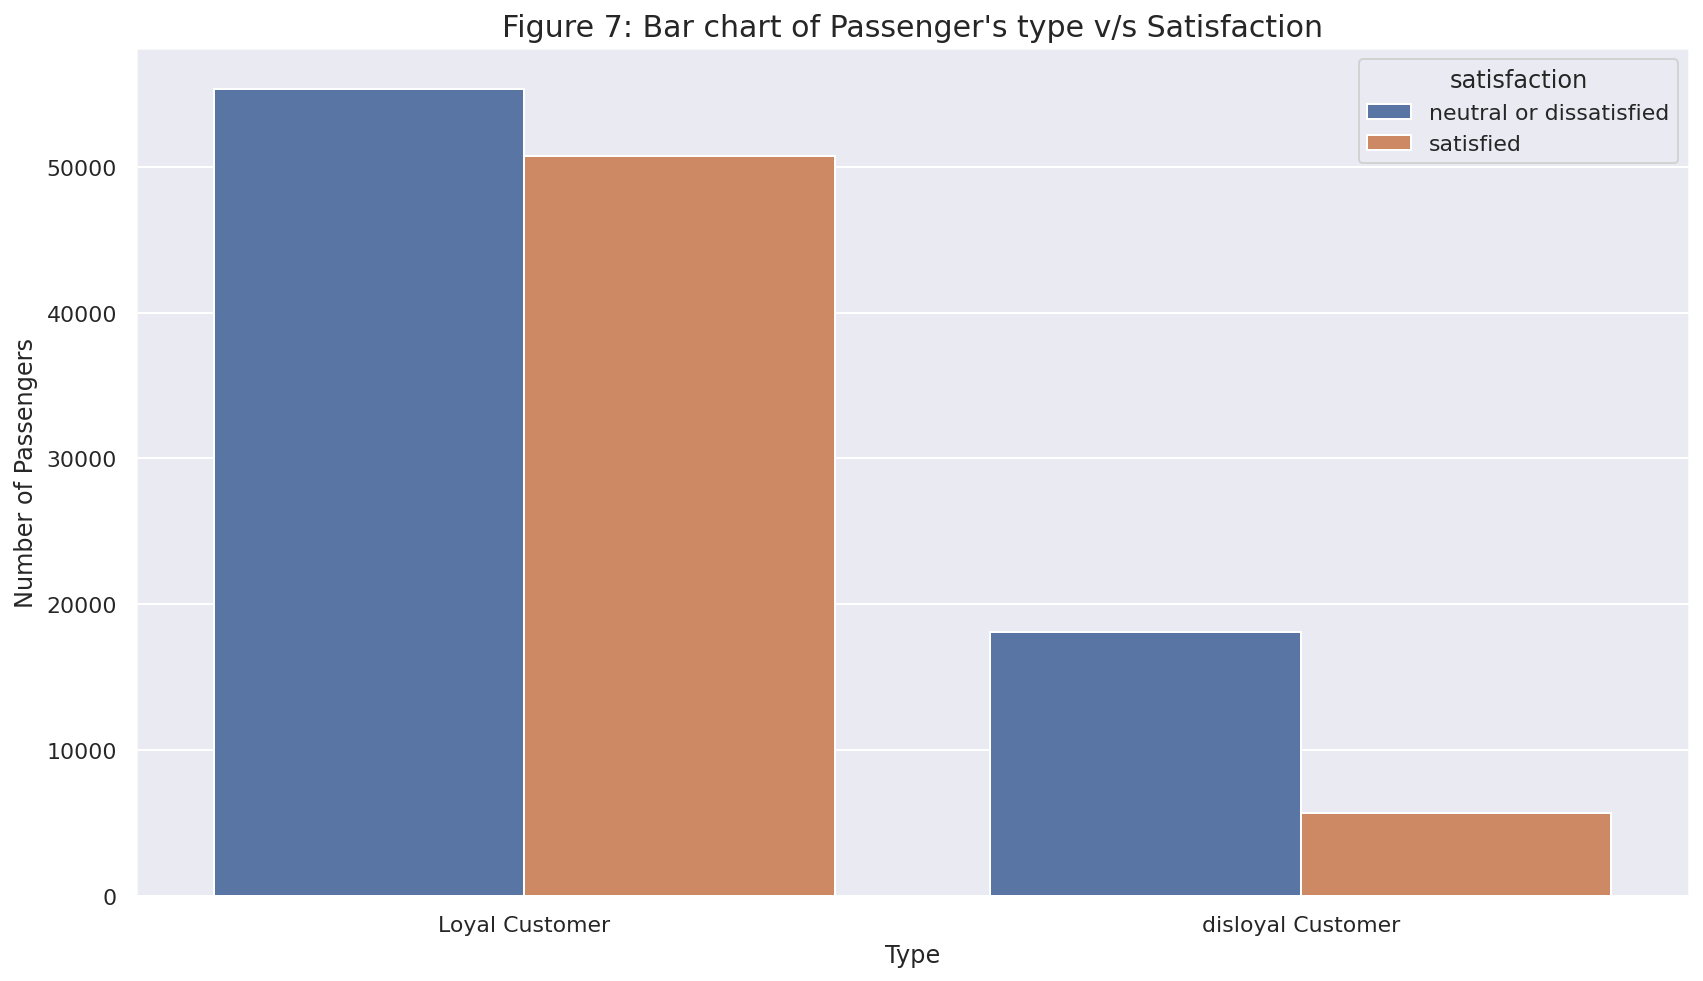

In [ ]:

plt.figure(figsize=(12,7))
ax = sns.countplot(x='customer_type', hue='satisfaction', data=df)
ax.set_title("Figure 7: Bar chart of Passenger's type v/s Satisfaction",fontsize = 15)
ax.set_ylabel("Number of Passengers",fontsize=12)
ax.set_xlabel("Type",fontsize=12)
plt.tight_layout()
plt.show()

Around 55000 number of loyal customers are nuetral or dissatisfied with this airline where only around 18000 disloyal customers were satisfied. Number of satisfied customers were less in both loyal and disloyal customers.

<Figure size 864x504 with 0 Axes>

Text(0.5, 1.0, "Figure 8: Bar chart of Passenger's class v/s Satisfaction")

Text(0, 0.5, 'Number of Passengers')

Text(0.5, 0, 'Class')

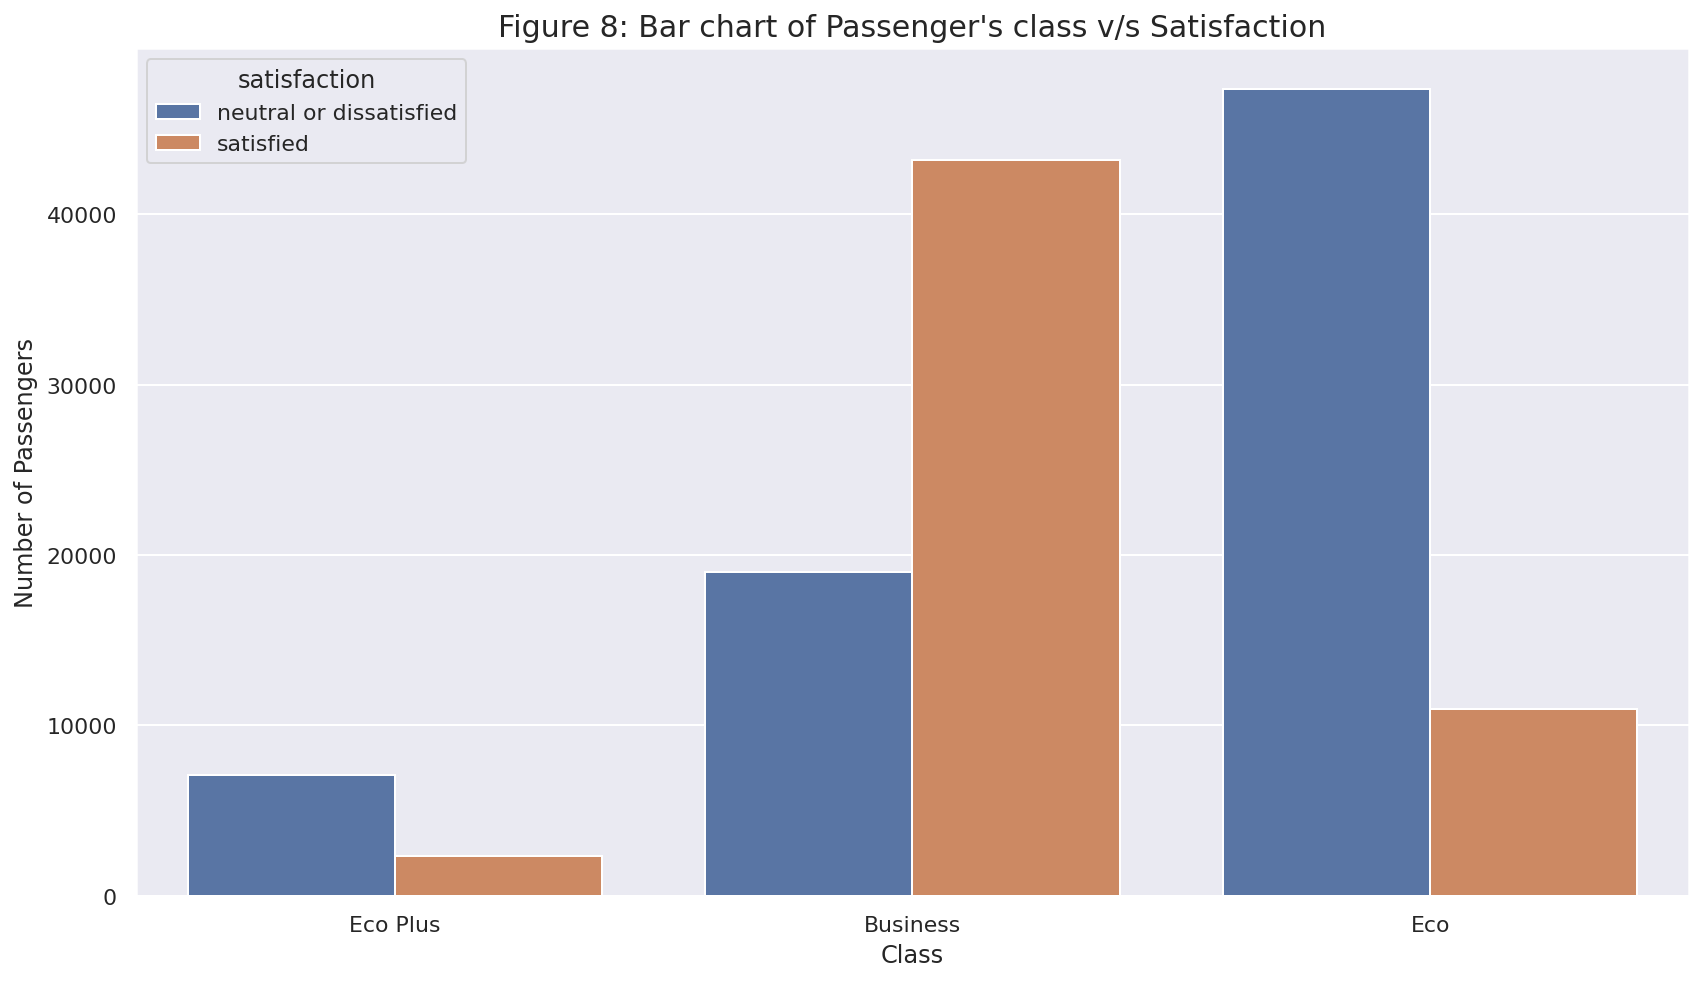

In [ ]:

plt.figure(figsize=(12,7))
ax = sns.countplot(x='customer_class', hue='satisfaction', data=df)
ax.set_title("Figure 8: Bar chart of Passenger's class v/s Satisfaction",fontsize = 15)
ax.set_ylabel("Number of Passengers",fontsize=12)
ax.set_xlabel("Class",fontsize=12)
plt.tight_layout()
plt.show()

Bar graph shows that business class has satisfied highest number of passengers.The number of passengers satisfied with echo plus class was very less.The highest number of passengers vere neutral or dissatisfied with Eco class.

<Figure size 864x504 with 0 Axes>

Text(0.5, 1.0, 'Figure 9: Bar chart of Satisfaction level of Departure/Arrival time convenient v/s Satisfaction')

Text(0, 0.5, 'Number of Passengers')

Text(0.5, 0, 'Satisfaction level')

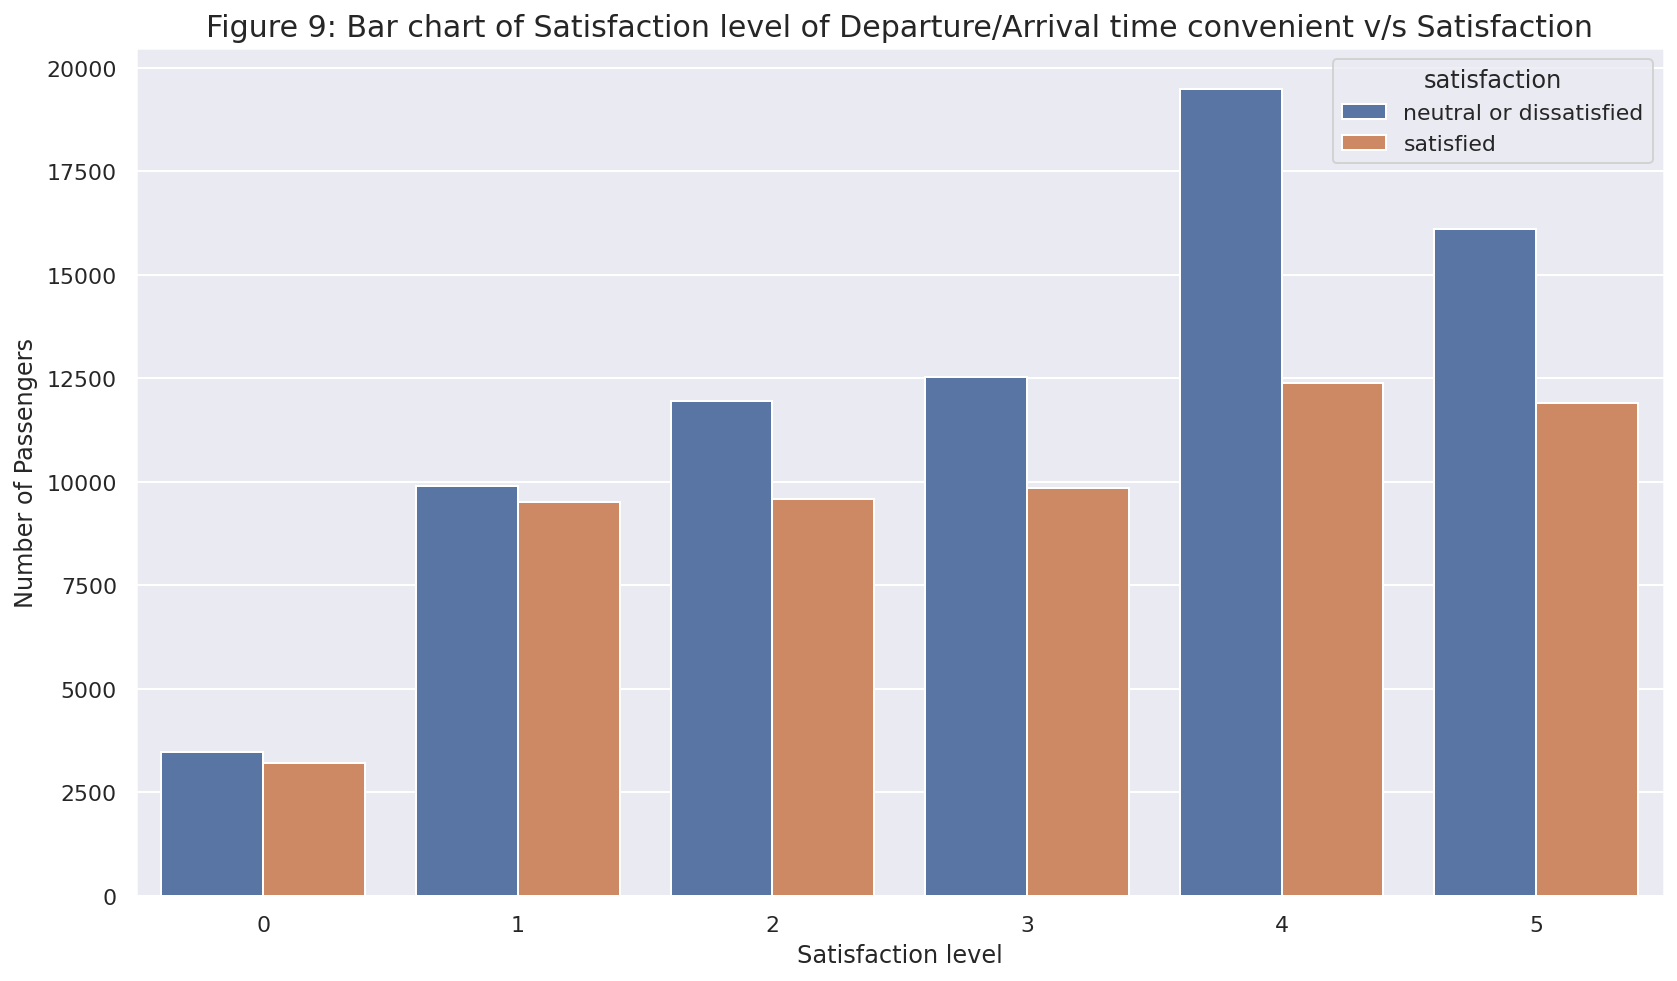

In [ ]:

plt.figure(figsize=(12,7))
ax = sns.countplot(x='departure_arrival_time_convenient', hue='satisfaction', data=df)
ax.set_title("Figure 9: Bar chart of Satisfaction level of Departure/Arrival time convenient v/s Satisfaction",fontsize = 15)
ax.set_ylabel("Number of Passengers",fontsize=12)
ax.set_xlabel("Satisfaction level",fontsize=12)
plt.tight_layout()
plt.show()

Almost 12000 satisfied passengers had showed highest satisfaction level in terms of Arrival and departure time convinience. The highest number of neutral of dissatisfied passengers had showed highest satisfsction in terms of arrival and departure time convinience. Almost same number of passengers were less satisfied with arrival and departure time convinience.

<Figure size 864x504 with 0 Axes>

Text(0.5, 1.0, 'Figure 10: Bar chart of Satisfaction level of food and drink v/s Satisfaction')

Text(0, 0.5, 'Number of Passengers')

Text(0.5, 0, 'Satisfaction level')

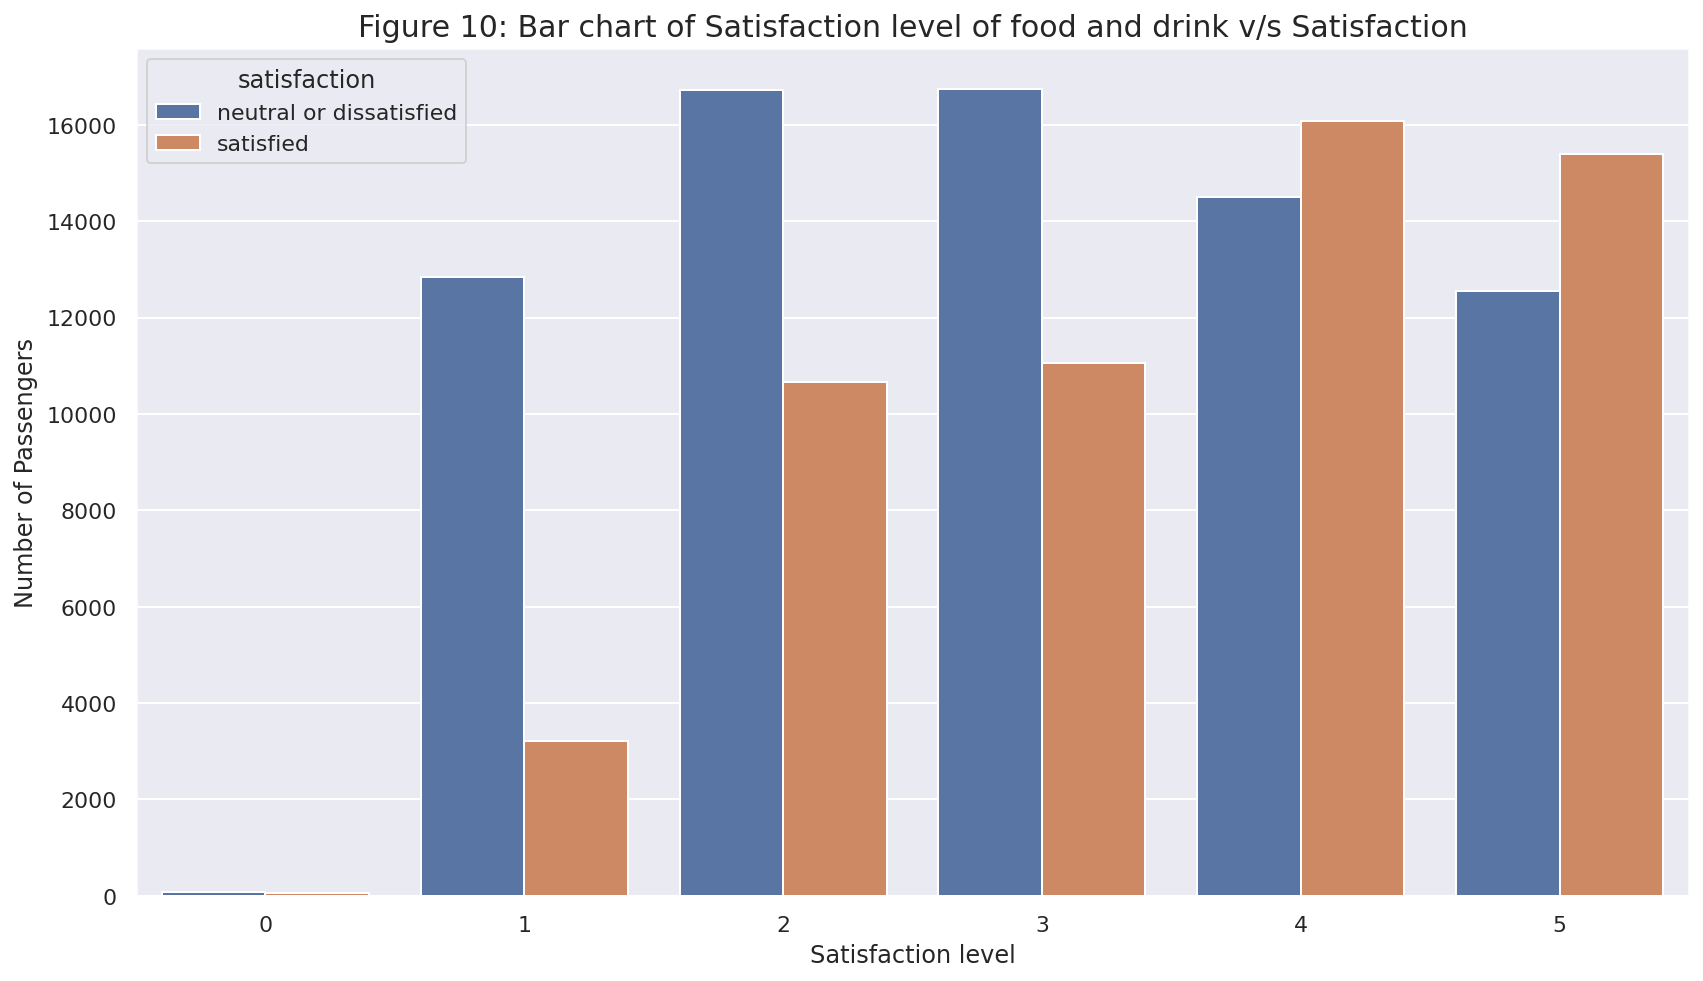

In [ ]:

plt.figure(figsize=(12,7))
ax = sns.countplot(x='food_and_drink', hue='satisfaction', data=df)
ax.set_title("Figure 10: Bar chart of Satisfaction level of food and drink v/s Satisfaction",fontsize = 15)
ax.set_ylabel("Number of Passengers",fontsize=12)
ax.set_xlabel("Satisfaction level",fontsize=12)
plt.tight_layout()
plt.show()

Around 16000 neutral or dissatisfied passengers were medium satisfied with food and drink facilities,wheres high number of satisfied customers had showed highest satisfaction level in food and drinking facilities.

<Figure size 720x360 with 0 Axes>

Text(0.5, 0.98, 'Figure 11: linear regression plot of Age and Flight distance v/s customer class')

<Figure size 720x360 with 0 Axes>

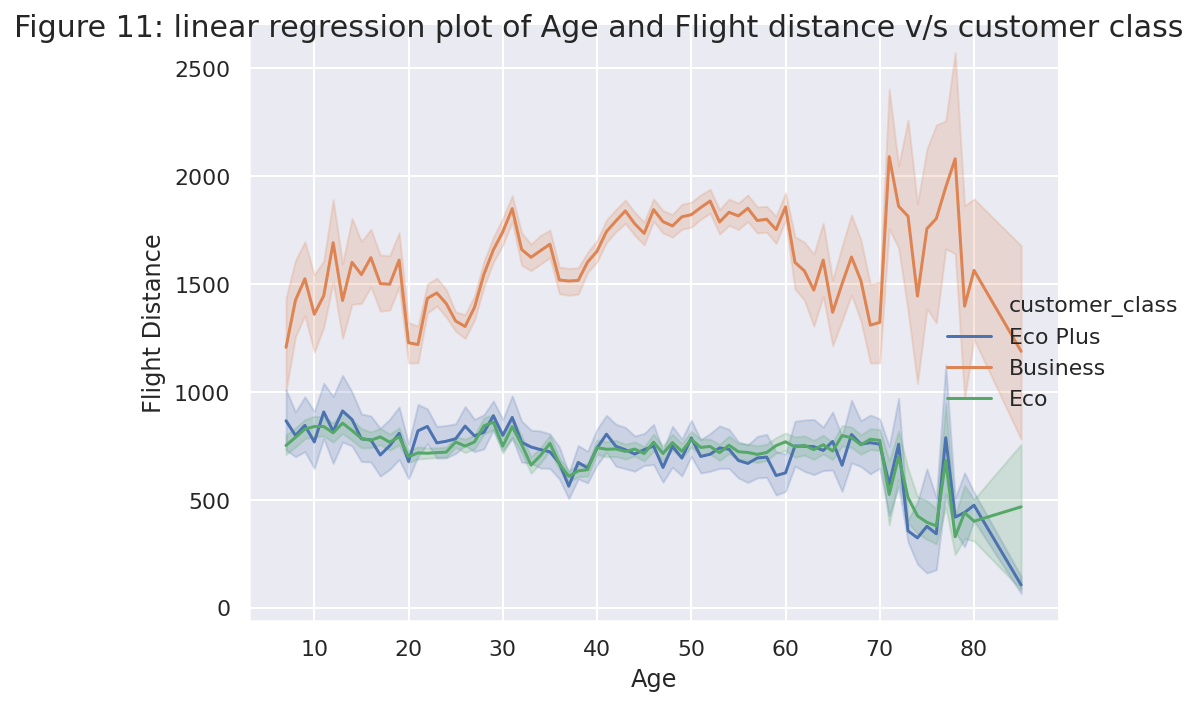

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.relplot(x="age", y="flight_distance", hue="customer_class",
            kind="line", data=df);
plt.subplots_adjust(top=0.9)
ax.fig.suptitle("Figure 11: linear regression plot of Age and Flight distance v/s customer class",fontsize = 15)
ax.set_ylabels("Flight Distance",fontsize=12)
ax.set_xlabels("Age",fontsize=12)
plt.tight_layout()
plt.show()

From above line graph, it is clear that with the flight distance above 1500, almost all the passengers were highly prefer business class travel.Almost same number of customers below aage 60 had prefered Echo plus or Echo class with flight distance less than 1000.

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Figure 12: Bar chart of age and seat_comfort v/s Satisfaction')

Text(0, 0.5, 'Age')

Text(0.5, 0, 'Seat Comfort')

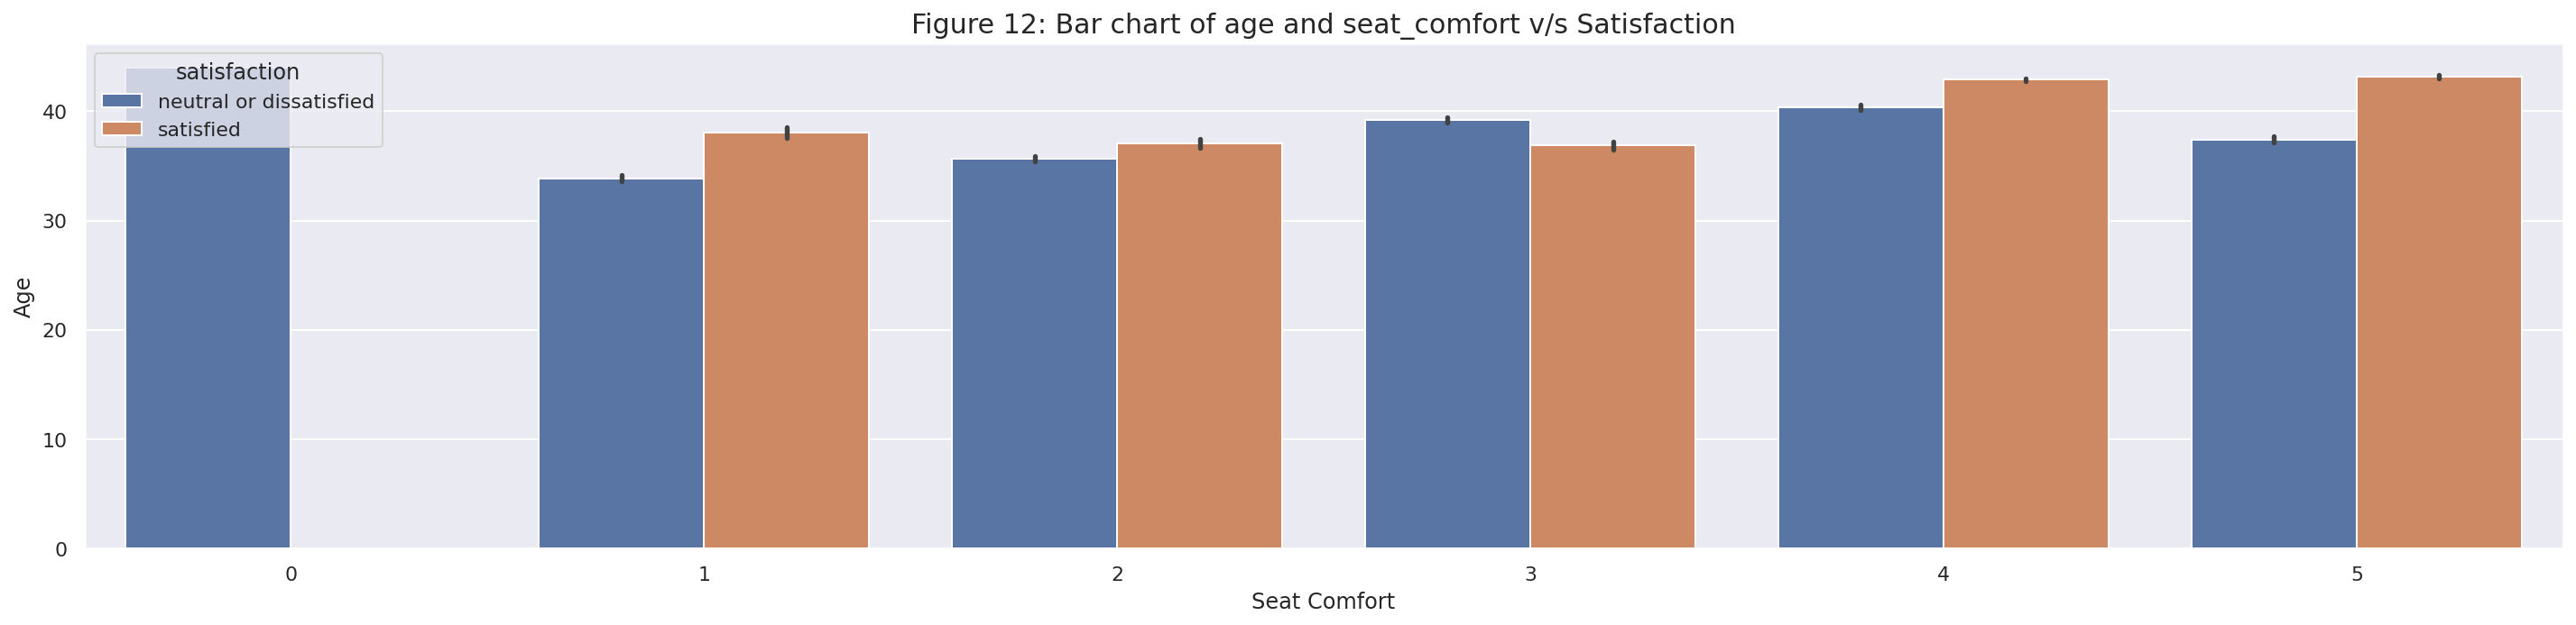

In [ ]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x="seat_comfort", y="age", hue="satisfaction", data=df)
ax.set_title("Figure 12: Bar chart of age and seat_comfort v/s Satisfaction",fontsize = 15)
ax.set_ylabel("Age",fontsize=12)
ax.set_xlabel("Seat Comfort",fontsize=12)
plt.tight_layout()
plt.show()

Almost all satisfied passengers with age above 30 had given 1 to 5  ratings to seat comfort facility and number of neutral or dissatisfied passengers with age above 30 had given 0 to 5 ratings to seatcomfort facility.

Text(0.5, 1.0, 'Figure 13: Scatter plot of Departure and arrival time delay v/s Satisfaction')

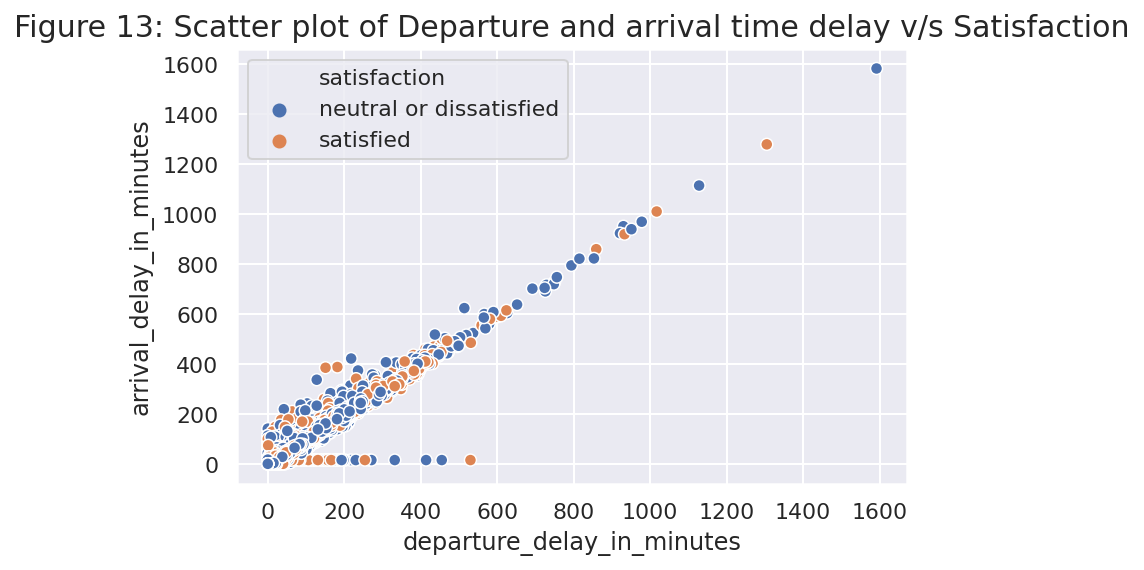

In [ ]:

ax=sns.scatterplot(x='departure_delay_in_minutes',y='arrival_delay_in_minutes',hue = 'satisfaction',data=df,cmap = 'rainbow')
ax.set_title("Figure 13: Scatter plot of Departure and arrival time delay v/s Satisfaction",fontsize = 15)

From above scatter plot, it is clear that almost all satisfied and neutral or dissatisfied customers did not like delay more that 800 in both either arrival or departure time.

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Figure 14: Bar chart of customer class and flight distance v/s Satisfaction')

Text(0, 0.5, 'Flight Distance')

Text(0.5, 0, 'Customer Class')

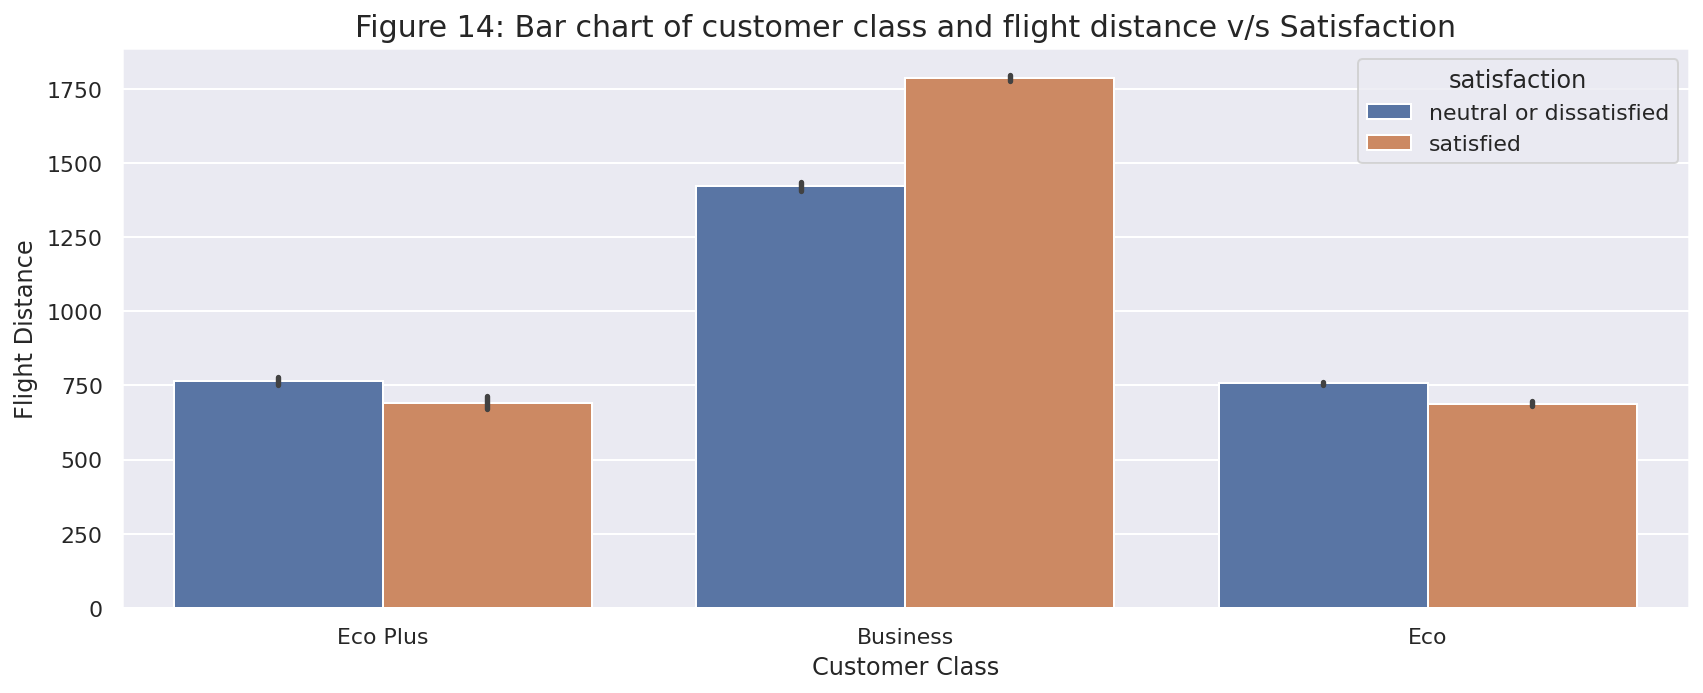

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='customer_class',y='flight_distance', hue='satisfaction', data=df)
ax.set_title("Figure 14: Bar chart of customer class and flight distance v/s Satisfaction",fontsize = 15)
ax.set_ylabel("Flight Distance",fontsize=12)
ax.set_xlabel("Customer Class",fontsize=12)
plt.tight_layout()
plt.show()

All satisfied customers with flight distance above 1600 had prefered business class. Same number of neutral or dissatisfied and satisfied customers had prefered either Echo plus or Echo class with flight distance below 800.

# References

vaksakalli/datasets. GitHub. (2020). Retrieved 27 September 2020, from https://github.com/vaksakalli/datasets.

pandas documentation, https://pandas.pydata.org/pandas-docs/stable/index.html

stackoverflow, https://stackoverflow.com/

Data Preparation for Machine Learning | www.featureranking.com. www.featureranking.com. (2020). Retrieved 27 September 2020, from https://www.featureranking.com/tutorials/machine-learning-tutorials/data-preparation-for-machine-learning/.

In [ ]:
!jupyter nbconvert --to html Phase1.ipynb

[NbConvertApp] Converting notebook Phase1.ipynb to html
[NbConvertApp] Writing 290227 bytes to Phase1.html
